**Installing Libraries**

In [1]:
!pip install torch torchvision torchaudio torchtext

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.2/779.2 MB 2.3 MB/s eta 0:00:0000:0100:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.1 MB/s eta 0:00:0000:0100:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 6.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 3.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.2 MB/s eta 0:00:0000:0100:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 3.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.2/176.2 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━

In [2]:
!pip install pytorch-forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 7.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1793 lines of output]
      Partial import of sklearn during the build process.
      setup.py:128: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command.build_ext import build_ext  # noqa
      INFO: C compiler: 

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xlwt torchsummary torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 1.5 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


**Importing Libraries**

In [5]:
import torch
from torch.utils.data import DataLoader, Dataset

from torch import nn
from torch import optim
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torchsummary import summary
from torch import optim
import torchvision
from torchvision import transforms, utils

import cv2
import random
import math
import scipy.io
import os
from PIL import Image

ModuleNotFoundError: No module named 'cv2'

**Operators.py**

In [ ]:
from copy import deepcopy

def crossover(x, y):
    x = deepcopy(x)
    y = deepcopy(y)

    '''First parent'''
    x_nconv = x.n_conv
    x_nfull = x.n_full
    xblocks = x.first_level
    xbinary = x.second_level

    '''Second parent'''
    y_nconv = y.n_conv
    y_nfull = y.n_full
    yblocks = y.first_level
    ybinary = y.second_level

    '''Convolutional part crossover'''
    if x_nconv > y_nconv:
        k = math.floor(y_nconv/2)
        index = list(range(x_nconv))

        '''Exchanging the last k blocks of the smaller parent'''
        for i in range(k, y_nconv):
            block = yblocks[i] #ith block
            ix = random.choice(index) #Selecting random index from larger parent
            index.remove(ix)

            #Exchange of blocks
            yblocks[i] = xblocks[ix]
            xblocks[ix] = block

    if y_nconv > x_nconv:
        k = math.floor(x_nconv/2)
        index = list(range(y_nconv))

        '''Exchanging the last k blocks of the smaller parent'''
        for i in range(k, x_nconv):
            block = xblocks[i] #ith block
            ix = random.choice(index) #Selecting random index from larger parent
            index.remove(ix)

            #Exchange of blocks
            xblocks[i] = yblocks[ix]
            yblocks[ix] = block

    if x_nconv == y_nconv:
        k = math.floor(x_nconv/2)
        index = list(range(x_nconv))

        x_part = xblocks[k:x_nconv]

        '''Exchaning last half of the blocks'''
        xblocks[k:x_nconv] = yblocks[k:y_nconv]
        yblocks[k:y_nconv] = x_part

    '''Fully-connected part'''
    if x_nfull > y_nfull:
        k = math.floor(y_nfull/2)
        index = list(range(x_nconv, x_nconv + x_nfull))

        '''Exchanging the last k blocks of the smaller parent'''
        for i in range(y_nconv + k, y_nconv + y_nfull):
            block = yblocks[i] #ith block
            ix = random.choice(index) #Selecting random index from larger parent
            index.remove(ix)

            #Exchange of blocks
            yblocks[i] = xblocks[ix]
            xblocks[ix] = block

    if y_nfull > x_nfull:
        k = math.floor(x_nfull/2)
        index = list(range(y_nconv, y_nconv + y_nfull))

        '''Exchanging the last k blocks of the smaller parent'''
        for i in range(x_nconv + k, x_nconv + x_nfull):
            block = xblocks[i] #ith block
            ix = random.choice(index) #Selecting random index from larger parent
            index.remove(ix)

            #Exchange of blocks
            xblocks[i] = yblocks[ix]
            yblocks[ix] = block

    if x_nfull == y_nfull:
        k = math.floor(x_nfull/2)

        x_part = xblocks[x_nconv + k:x_nconv + x_nfull]
        '''Exchaning last half of the blocks'''
        xblocks[x_nconv + k:x_nconv + x_nfull] = yblocks[y_nconv + k:y_nconv + y_nfull]
        yblocks[y_nconv + k:y_nconv + y_nfull] = x_part

    '''Second level'''
    if len(xbinary) > len(ybinary):
        if len(ybinary) > 1 :
            k = random.choice(list(range(1, len(ybinary))))
            partition = ybinary[k:]
            nbits = len(partition)

            if random.uniform(0,1) >= 0.5:
                ybinary[k:] = xbinary[len(xbinary) - nbits:len(xbinary)]
                xbinary[len(xbinary) - nbits:len(xbinary)] = partition
            else:
                ybinary[k:] = xbinary[:nbits]
                xbinary[:nbits] = partition

    if len(ybinary) > len(xbinary):
        if len(xbinary) > 1 :
            k = random.choice(list(range(len(xbinary))))
            partition = xbinary[k:]
            nbits = len(partition)

            if random.uniform(0,1) >= 0.5:
                xbinary[k:] = ybinary[len(ybinary) - nbits:len(ybinary)]
                ybinary[len(ybinary) - nbits:len(ybinary)] = partition
            else:
                xbinary[k:] = ybinary[:nbits]
                ybinary[:nbits] = partition

    if len(xbinary) == len(ybinary):
        if len(xbinary) > 1 :
            k = random.choice(list(range(len(xbinary))))
            partition = xbinary[k:]

            xbinary[k:] = ybinary[k:]
            ybinary[k:] = partition

    return x, y

def mutation(x):
    if random.uniform(0,1) < 0.5:
        '''Adding a new block'''
        if random.uniform(0,1) > 0.5:
            #Adding a fully-connected block
            layer = {'type' : 'fc',
                     'neurons' : random.choice(NEURONS)}

            #Choosing a random index to insert the new block
            index = list(range(x.n_conv, x.n_conv + x.n_full))
            ix = random.choice(index)

            x.first_level.insert(ix, layer)
            x.n_full += 1

        else:
            #Adding a convolutional block
            layer = {'type' : 'conv',
                     'nfilters' : random.choice(NFILTERS),
                     'fsize' : random.choice(FSIZES),
                     'pool' : random.choice(['max', 'avg', 'off']),
                     'psize' : random.choice(PSIZES)
                    }
            #Choosing a random index to insert the new block
            index = list(range(x.n_conv))
            ix = random.choice(index)

            x.first_level.insert(ix, layer)
            x.n_conv += 1

            if ix > 1:
                new_bits = []
                for i in range(ix - 1):
                    new_bits.append(random.choice([0,1]))
                pos = int(0.5*(ix**2) - 1.5*(ix) + 1)
                start = pos + len(new_bits)
                for bit in new_bits:
                    x.second_level.insert(pos, bit)
                    pos += 1

                rest = x.n_conv - ix - 1
                add = ix
                for j in range(rest):
                    x.second_level.insert(start+add-1, random.choice([0,1]))
                    start += add
                    ix += 1

            if ix == 0 or ix == 1:
                if x.n_conv - 1 == 2:
                    x.second_level.append(random.choice([0,1]))
                else:
                    add = 0
                    for i in range(2, x.n_conv):
                        pos = int(0.5*(ix**2) - 1.5*(ix) + 1) + add
                        x.second_level.insert(pos, random.choice([0,1]))
                        add += 1

    else:
        '''Changing hyperparameters in one block'''
        if random.uniform(0,1) > 0.5:
            '''Re-starting a fully-connected block'''
            index = list(range(x.n_conv, x.n_conv + x.n_full))
            ix = random.choice(index)
            new_layer = {'type' : 'fc',
                         'neurons' : random.choice(NEURONS)}
            #Switching fully-connected block
            x.first_level[ix] = new_layer

        else:
            '''Re-starting a convolutional block'''
            index = list(range(x.n_conv))
            ix = random.choice(index)
            new_layer = {'type' : 'conv',
                     'nfilters' : random.choice(NFILTERS),
                     'fsize' : random.choice(FSIZES),
                     'pool' : random.choice(['max', 'avg', 'off']),
                     'psize' : random.choice(PSIZES)
                    }

            #Switching convolutional block
            x.first_level[ix] = new_layer

        '''Modifying connections in second level'''
        if len(x.second_level) > 0:
            k = random.choice(list(range(len(x.second_level))))
            #Flipping one bit in the second level
            if x.second_level[k] == 1:
                x.second_level[k] = 0
            else:
                x.second_level[k] = 1


def selection(tournament, style):
    '''Stochastic tournament selection'''
    if style == 'max':
        if random.uniform(0,1) <= 0.8:
            p = max(tournament, key = lambda x: x[1])
        else:
            p = random.choice(tournament)
    else:
        if random.uniform(0,1) <= 0.8:
            p = min(tournament, key = lambda x: x[1])
        else:
            p = random.choice(tournament)

    return p

**EncodingClass.py**

In [ ]:
'''Hyperparameters configuration'''
#Convolutional layers
'''Hyperparameters configuration'''
#Convolutional layers
FSIZES = [2,3,4,5,6]
#FSIZES = [2,3,4,5,6,7,8]
NFILTERS = [2,4,8,16,32]

#Pooling layers
PSIZES = [2,3,4,5]
PTYPE = ['max', 'avg']

#Fully connected layers
NEURONS = [4,8,16,32,64,128]

class Encoding:
    def __init__(self, minC, maxC, minF, maxF):
        self.n_conv = random.randint(minC, maxC)
        self.n_full = random.randint(minF, maxF)


        '''First level encoding'''
        self.first_level = []

        #Feature extraction part
        for i in range(self.n_conv):
            layer = {'type' : 'conv',
                     'nfilters' : random.choice(NFILTERS),
                     'fsize' : random.choice(FSIZES),
                     'pool' : random.choice(['max', 'avg', 'off']),
                     'psize' : random.choice(PSIZES)
                    }
            self.first_level.append(layer)

        #Fully connected part
        for i in range(self.n_full):
            layer = {'type' : 'fc',
                     'neurons' : random.choice(NEURONS)}

            self.first_level.append(layer)


        '''Second level encoding'''
        self.second_level = []
        prev = -1
        for i in range(self.n_conv):
            if prev < 1:
                prev += 1
            if prev >= 1:
                for _ in range(prev-1):
                    self.second_level.append(random.choice([0,1]))
                prev += 1

**Decondig.py**

In [ ]:
def conv_out_size(W, K):
    return W - K + 3

def pool_out_size(W, K):
    return math.floor((W - K)/2) + 1

In [ ]:
def decoding(encoding):
  n_conv = encoding.n_conv
  n_full = encoding.n_full
  first_level = encoding.first_level
  second_level = encoding.second_level

  features = []
  classifier = []
  in_channels = 1
  out_size = 92
  prev = -1
  pos = 0
  o_sizes = []
  for i in range(n_conv):
    layer = first_level[i]
    n_filters = layer['nfilters']
    f_size = layer['fsize']
    pad = 1
    if f_size > out_size:
        f_size = out_size - 1
    if i == 0 or i == 1:
      if layer['pool'] == 'off':
        operation = [nn.Conv2d(in_channels = in_channels, out_channels = n_filters, kernel_size = f_size, padding = pad),
                    nn.BatchNorm2d(n_filters),
                    nn.ReLU(inplace = True)]
        in_channels = n_filters
        out_size = conv_out_size(out_size, f_size)
        o_sizes.append([out_size, in_channels])

      if layer['pool'] == 'avg':
          p_size = layer['psize']
          if p_size > out_size:
              p_size = out_size - 1
          operation = [nn.Conv2d(in_channels = in_channels, out_channels = n_filters, kernel_size = f_size, padding = pad),
                      nn.BatchNorm2d(n_filters),
                      nn.ReLU(inplace = True),
                      nn.AvgPool2d(kernel_size = p_size, stride = 2)]
          in_channels = n_filters
          out_size = conv_out_size(out_size, f_size)
          out_size = pool_out_size(out_size, p_size)
          o_sizes.append([out_size, in_channels])

      if layer['pool'] == 'max':
          p_size = layer['psize']
          if p_size > out_size:
              p_size = out_size - 1
          operation = [nn.Conv2d(in_channels = in_channels, out_channels = n_filters, kernel_size = f_size, padding = pad),
                      nn.BatchNorm2d(n_filters),
                      nn.ReLU(inplace = True),
                      nn.MaxPool2d(kernel_size = p_size, stride = 2)]
          in_channels = n_filters
          out_size = conv_out_size(out_size, f_size)
          out_size = pool_out_size(out_size, p_size)
          o_sizes.append([out_size, in_channels])
    else:
      connections = second_level[pos:pos+prev]
      for c in range(len(connections)):
        if connections[c] == 1:
          in_channels += o_sizes[c][1]

      if layer['pool'] == 'off':
        operation = [nn.Conv2d(in_channels = in_channels, out_channels = n_filters, kernel_size = f_size, padding = pad),
                    nn.BatchNorm2d(n_filters),
                    nn.ReLU(inplace = True)]
        in_channels = n_filters
        out_size = conv_out_size(out_size, f_size)
        o_sizes.append([out_size, in_channels])

      if layer['pool'] == 'avg':
          p_size = layer['psize']
          if p_size > out_size:
              p_size = out_size - 1
          operation = [nn.Conv2d(in_channels = in_channels, out_channels = n_filters, kernel_size = f_size, padding = pad),
                      nn.BatchNorm2d(n_filters),
                      nn.ReLU(inplace = True),
                      nn.AvgPool2d(kernel_size = p_size, stride = 2)]
          in_channels = n_filters
          out_size = conv_out_size(out_size, f_size)
          out_size = pool_out_size(out_size, p_size)
          o_sizes.append([out_size, in_channels])

      if layer['pool'] == 'max':
          p_size = layer['psize']
          if p_size > out_size:
              p_size = out_size - 1
          operation = [nn.Conv2d(in_channels = in_channels, out_channels = n_filters, kernel_size = f_size, padding = pad),
                      nn.BatchNorm2d(n_filters),
                      nn.ReLU(inplace = True),
                      nn.MaxPool2d(kernel_size = p_size, stride = 2)]
          in_channels = n_filters
          out_size = conv_out_size(out_size, f_size)
          out_size = pool_out_size(out_size, p_size)
          o_sizes.append([out_size, in_channels])

      pos += prev
    prev += 1

    features.append(operation)
  in_size = out_size*out_size*in_channels
  for i in range(n_conv,(n_conv + n_full)):
    layer = first_level[i]
    n_neurons = layer['neurons']
    classifier += [nn.Linear(in_size, n_neurons)]
    classifier += [nn.ReLU(inplace = True)]
    in_size = n_neurons

  ##Last layer generates the last neurons for softmax (change this for binary classification)
  classifier += [nn.Linear(n_neurons, 3)]

  return features, classifier, o_sizes

In [ ]:
'''Networks class'''
class CNN(nn.Module):
  def __init__(self, encoding, features, classifier, sizes, init_weights = True):
    super(CNN, self).__init__()
    extraction = []
    for layer in features:
      extraction += layer
    self.extraction = nn.Sequential(*extraction)
    self.classifier = nn.Sequential(*classifier)
    self.features = features
    self.second_level = encoding.second_level
    self.sizes = sizes

  def forward(self, x):
    '''Feature extraction'''
    prev = -1
    pos = 0
    outputs = {}
    features = self.features
    #print(x.shape)
    for i in range(len(features)):
      #print('Layer: ', i)
      if i == 0 or i == 1:
        x = nn.Sequential(*features[i])(x)
        outputs[i] = x
        #print(x.shape)

      else:
        connections = self.second_level[pos:pos+prev]
        for c in range(len(connections)):
          if connections[c] == 1:
            skip_size = self.sizes[c][0] #Size comming from previous layer
            req_size = x.shape[2] #Current feature map size
            #print('X: ',x.shape)
            if skip_size > req_size:
              psize = skip_size - req_size + 1
              pool = nn.MaxPool2d(kernel_size = psize, stride = 1) #Applying pooling to adjust sizes
              x2 = pool(outputs[c])
            if skip_size == req_size:
              x2 = outputs[c]
            if req_size == skip_size + 1:
              pool = nn.MaxPool2d(kernel_size = 2, stride = 1, padding = (1,1))
              x2 = pool(outputs[c])
            if req_size == skip_size + 2:
              pad = int((req_size - skip_size)/2)
              padding = nn.ZeroPad2d(pad)
              x2 = padding(outputs[c])
            #print('X2: ',x2.shape)
            x = torch.cat((x, x2), axis = 1)

        x = nn.Sequential(*features[i])(x)
        #print('Out size: ', x.shape)
        outputs[i] = x
        pos += prev

      prev += 1

    #print('Classification size: ', x.shape)
    x = torch.flatten(x,1)
    '''Classification'''
    '''for l in self.classifier:
      x = l(x)'''
    x = self.classifier(x)
    #print(x.shape)
    return nn.functional.log_softmax(x, dim=1)

**Loading Data**

In [ ]:
# #Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

**DataReader.py**

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.labels = []  # Lista de etiquetas de clase
        self.datos = []
        file_csv = os.path.join(
            root_dir, "dataset.csv")
        data = np.loadtxt(file_csv, delimiter=',', skiprows=0)
        # Removemos la última columnas
        label = data[:, -1]  # Obtenemos la clase
        self.labels = label.astype(int)
        self.datos = data[:, :-1]  # Obtenemos los datos
        # Sección para agregar 26 columnas con la finalidad de realizar el reshape
        # tam = data.shape[0];
        # complemento = np.zeros((tam,26))
        # self.datos = np.concatenate([complemento, data], axis=1)
        # self.datos = data

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        # img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = self.datos[idx]
        # vect2 = np.zeros(26, dtype=float)
        # image = np.concatenate([vect2, image], axis=None)
        # Redimensionar la imagen a 92
        image = np.array(image)
        print(image.shape)
        image = image.reshape(92, 92)
        [H, W] = image.shape
        image = image.reshape((H, W, -1))
        # print(image)
        label = self.labels[idx]

        sample = {"image": image, "label": label}

        if self.transform:
            sample = self.transform(sample)

        return sample


class ToTensor(object):
    def __call__(self, sample):
        image, label = sample["image"], sample["label"]
        image = image.transpose((2, 0, 1))
        return {"image": torch.from_numpy(image), "label": label}


def loading_data():
    root_dir = '../../../data'
    custom_dataset = CustomDataset(
        root_dir=root_dir, transform=transforms.Compose([ToTensor()]))

    train_size = int(0.7 * len(custom_dataset))
    test_size = len(custom_dataset) - train_size

    train_dataset, test_dataset = torch.utils.data.random_split(
        custom_dataset, [train_size, test_size])
    print('Data size training: ', len(train_dataset))
    print('Data size test: ', len(test_dataset))
    train_loader = DataLoader(train_dataset, batch_size=30, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=30, shuffle=True)

    return train_loader, test_loader

In [ ]:
train_dl, test_dl = loading_data()

Data size training:  823
Data size test:  353


In [ ]:
""" Dimensiones del tensor test"""
for i_batch,sample_batched in enumerate(test_dl):
  print(sample_batched['image'].shape)
  print(sample_batched['label'])
  break

(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
(8464,)
torch.Size([30, 1, 92, 92])
tensor([4, 1, 5, 2, 0, 4, 5, 1, 4, 4, 4, 0, 5, 5, 3, 5, 3, 4, 0, 2, 3, 5, 5, 5,
        4, 0, 0, 4, 3, 5])


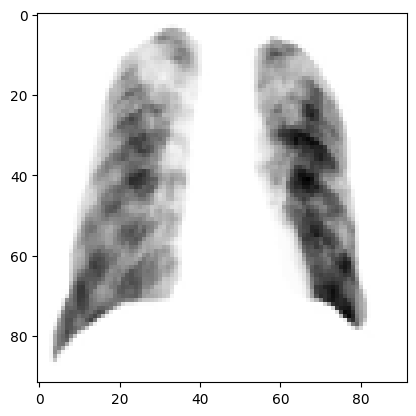

In [ ]:
sample_batched['image'][0]
imagen = sample_batched['image'][0]
imagen = np.squeeze(imagen)
# Muestra la imagen en escala de grises
plt.imshow(imagen,cmap='gray')
plt.show()

**DistributedTraining.py**

In [ ]:
def loss_batch(loss_func, xb, yb, yb_h, opt = None):
  #Obtain the loss
  loss = loss_func(yb_h, yb)
  #Obtain peformance metric
  metric_b = metrics_batch(yb, yb_h)
  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item(), metric_b
  #return metric_b

#Helper function to compute the accuracy per mini_batch
def metrics_batch(target, output):
  #Obtain output class
  pred = output.argmax(dim=1, keepdim = True)
  #Compare output class with target class
  corrects = pred.eq(target.view_as(pred)).sum().item()

  return corrects

#Helper function to compute the loss and metric values for a dataset
def loss_epoch(device, model, loss_func, dataset_dl, opt = None):
  loss = 0.0
  metric = 0.0
  len_data = len(dataset_dl.dataset)
  for i, data in enumerate(dataset_dl, 0):
    #print('batch: ', i)
    xb, yb = data['image'], data['label']
    xb = xb.type(torch.double).to(device, dtype = torch.float32)
    yb = yb.to(device, dtype = torch.long)

    #Obtain model output
    yb_h = model(xb)

    loss_b, metric_b = loss_batch(loss_func, xb, yb, yb_h, opt)
    #metric_b = loss_batch(loss_func, xb, yb, yb_h, opt)
    loss += loss_b
    if metric_b is not None:
      metric += metric_b

  loss /= len_data
  metric /= len_data

  return loss, metric
  #return metric

#Define the training function
def train_val(device, epochs, model, opt, loss_func, train_dl, test_dl):

  for epoch in range(epochs):
    #print(epoch)
    model.train()
    train_loss, train_metric = loss_epoch(device, model, loss_func, train_dl, opt)
    #train_metric = loss_epoch(model, loss_func, train_dl, opt)
    model.eval()
    with torch.no_grad():
      val_loss, val_metric = loss_epoch(device, model, loss_func, test_dl)
      #val_metric = loss_epoch(model, loss_func, test_dl)
    accuracy = val_metric

    #print("Epoch: %d, train loss: %.6f, val loss: %.6f, test accuracy: %.2f" %(epoch, train_loss, val_loss, accuracy))

  return accuracy, model

def training(num, device, model, n_epochs, loss_func, train_dl, test_dl, lr, w, max_params):
    #Number of parameters
    params = sum(p.numel() for p in model.parameters() if p.requires_grad)

    model.to(device)

    #Optimizer
    opt = optim.Adam(model.parameters(), lr = lr)

    #Obtaining training accuracy
    accuracy, _ = train_val(device, n_epochs, model, opt, loss_func, train_dl, test_dl)

    #Fitness function based on accuracy and No. of parameters
    #f = abs(accuracy - w*(1 - abs((max_params - params)/max_params)))
    f = (1 - w)*accuracy + w*((max_params - params)/max_params)
    '''if params < max_params:
        f = (1 - w)*accuracy + abs(w*((max_params - params)/max_params))'''
    '''else:
        #f = (1 - w)*accuracy - abs(w*((max_params - params)/max_params))
        f = accuracy - abs((max_params - params)/max_params)'''

    #Append results to multiprocessing list
    #acc_list.append([num, f, accuracy, params])
    return num, f, accuracy, params


**Loading GPU**

In [ ]:
print(torch.cuda.cudaStatus.ERROR_NOT_READY)
if torch.cuda.is_available():
  device1 = torch.device("cuda:0")
  print(device1)

34
cuda:0


**DeepGA**

In [ ]:
#Maximun and minimum numbers of layers to initialize networks
min_conv = 2
max_conv = 6
min_full = 1
max_full = 6

'''Genetic Algorithm Parameters'''
cr = 0.7 #Crossover rate
mr = 0.5 #Mutation rate
N = 20 #Population size
T = 50 #Number of generations
t_size = 5 #tournament size
w = 0.3 #penalization weight
max_params = 3e6
num_epochs = 50
lr = 1e-3
loss_func = nn.NLLLoss(reduction = "sum")

In [ ]:
import timeit
import pickle
import pandas as pd
from multiprocessing import Process, Manager
'''Initialize population'''
print('Initialize population')

#train_dl, test_dl = loading_data()

start = timeit.default_timer()
pop = []
bestAcc = []
bestF = []
bestParams = []
#manager = Manager()
while len(pop) < N:
    #acc_list = manager.list()

    #Creating genomes (genetic encoding)
    e1 = Encoding(min_conv,max_conv,min_full,max_full)
    #e2 = Encoding(min_conv,max_conv,min_full,max_full)

    #Decoding the networks
    network1 = decoding(e1)
    #network2 = decoding(e2)

    #Creating the CNNs
    cnn1 = CNN(e1, network1[0], network1[1], network1[2])
    #cnn2 = CNN(e2, network2[0], network2[1], network2[2])

    #Evaluate individuals
    num1, f1, accuracy1, params1 = training ('1', device1, cnn1, num_epochs, loss_func,
                                                  train_dl, test_dl, lr, w, max_params)

    #training2 = Process(target = training, args = ('2', device2, cnn2, num_epochs, loss_func,
    #                                              train_dl, test_dl, lr, w, max_params, acc_list))

    #training1.start()
    #training2.start()
    #training1.join()
    #training2.join()

    #if acc_list[0][0] == '1':
    pop.append([e1, f1, accuracy1, params1])
        #pop.append([e2, acc_list[1][1], acc_list[1][2], acc_list[1][3]])
    #else:
        #pop.append([e2, acc_list[0][1], acc_list[0][2], acc_list[0][3]])
        #pop.append([e1, acc_list[1][1], acc_list[1][2], acc_list[1][3]])

'''Genetic Algorithm'''
for t in range(T):
    print('Generation: ', t)

    #Parents Selection
    parents = []
    while len(parents) < int(N/2):
        #Tournament Selection
        tournament = random.sample(pop, t_size)
        p1 = selection(tournament, 'max')
        tournament = random.sample(pop, t_size)
        p2 = selection(tournament, 'max')
        while p1 == p2:
            tournament = random.sample(pop, t_size)
            p2 = selection(tournament, 'max')

        parents.append(p1)
        parents.append(p2)

    #Reproduction
    offspring = []
    while len(offspring) < int(N/2):
        par = random.sample(parents, 2)
        #Crossover + Mutation
        if cr >= random.uniform(0,1): #Crossover
            p1 = par[0][0]
            p2 = par[1][0]
            c1, c2 = crossover(p1, p2)

            #Mutation
            if mr >= random.uniform(0,1):
                mutation(c1)

            if mr >= random.uniform(0,1):
                mutation(c2)

            #Evaluate offspring
            #acc_list = manager.list()

            #Decoding the network
            network1 = decoding(c1)
            network2 = decoding(c2)

            #Creating the CNN
            cnn1 = CNN(c1, network1[0], network1[1], network1[2])
            cnn2 = CNN(c2, network2[0], network2[1], network2[2])

            #Evaluate individuals
            num_cnn1, f_cnn1, accuracy_cnn1, params_cnn1 = training('1', device1, cnn1, num_epochs, loss_func,
                                                  train_dl, test_dl, lr, w, max_params)
            offspring.append([c1, f_cnn1, accuracy_cnn1, params_cnn1])

            num_cnn2, f_cnn2, accuracy_cnn2, params_cnn2 = training('2', device1, cnn2, num_epochs, loss_func,
                                                  train_dl, test_dl, lr, w, max_params)
            offspring.append([c2, f_cnn2, accuracy_cnn2, params_cnn2])
            #training1.start()
            #training2.start()
            #training1.join()
            #training2.join()

            #if acc_list[0][0] == '1':
            #    offspring.append([c1, acc_list[0][1], acc_list[0][2], acc_list[0][3]])
            #    offspring.append([c2, acc_list[1][1], acc_list[1][2], acc_list[1][3]])
            #else:
            #    offspring.append([c2, acc_list[0][1], acc_list[0][2], acc_list[0][3]])
            #    offspring.append([c1, acc_list[1][1], acc_list[1][2], acc_list[1][3]])

    #Replacement with elitism
    pop = pop + offspring
    pop.sort(reverse = True, key = lambda x: x[1])
    pop = pop[:N]

    leader = max(pop, key = lambda x: x[1])
    bestAcc.append(leader[2])
    bestF.append(leader[1])
    bestParams.append(leader[3])


    print('Best fitness: ', leader[1])
    print('Best accuracy: ', leader[2])
    print('Best No. of Params: ', leader[3])
    print('No. of Conv. Layers: ', leader[0].n_conv)
    print('No. of FC Layers: ', leader[0].n_full)
    print('--------------------------------------------')

results = pd.DataFrame(list(zip(bestAcc, bestF, bestParams)), columns = ['Accuracy', 'Fitness', 'No. Params'])
final_networks = []
final_connections = []
objects = []
for member in pop:
    p = member[0]
    objects.append(p)
    n_conv = p.n_conv
    n_full = p.n_full
    description = 'The network has ' + str(n_conv) + ' convolutional layers ' + 'with: '
    for i in range(n_conv):
        nfilters = str(p.first_level[i]['nfilters'])
        fsize = str(p.first_level[i]['fsize'])
        pool = str(p.first_level[i]['pool'])
        psize = str(p.first_level[i]['psize'])
        layer = '(' + nfilters + ', ' + fsize + ', ' + pool + ', ' + psize + ') '
        description += layer
    description += 'and '
    description += str(n_full)
    description += ' '
    description += 'fully-connected layers with: '
    for i in range(n_conv, n_conv+n_full):
        neurons = str(p.first_level[i]['neurons'])
        layer = '(' + neurons + ')'
        description += layer
    description += ' neurons'
    final_networks.append(description)

    connections = ''
    for bit in p.second_level:
        if bit == 1:
            connections += 'one - '
        if bit == 0:
            connections += 'zero - '
    final_connections.append(connections)


final_population = pd.DataFrame(list(zip(final_networks, final_connections)), columns = ['Network Architecture', 'Connections'])

'''Saving Results as CSV'''
final_population.to_csv('final_population.csv', index = False)
results.to_csv('results.csv', index = False)
stop = timeit.default_timer()
execution_time = (stop-start)/3600
print("Execution time: ", execution_time)

#Saving objects

with open('cnns.pkl', 'wb') as output:
    pickle.dump(objects, output, pickle.HIGHEST_PROTOCOL)
    output.close()


Initialize population


NameError: name 'Encoding' is not defined

In [ ]:
# !cp final_population.csv /content/gdrive/MyDrive/Ricardo

In [ ]:
# !cp result.csv /content/gdrive/MyDrive/Ricardo

In [ ]:
# !cp cnns.pkl /content/gdrive/MyDrive/Ricardo

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
import pickle
model = pickle.load(open("cnns.pkl", "rb"))

In [ ]:

final_networks = []
final_connections = []
objects = []
for member in output:
    p = member
    objects.append(p)
    n_conv = p.n_conv
    n_full = p.n_full
    description = 'The network has ' + str(n_conv) + ' convolutional layers ' + 'with: '
    for i in range(n_conv):
        nfilters = str(p.first_level[i]['nfilters'])
        fsize = str(p.first_level[i]['fsize'])
        pool = str(p.first_level[i]['pool'])
        psize = str(p.first_level[i]['psize'])
        layer = '(' + nfilters + ', ' + fsize + ', ' + pool + ', ' + psize + ') '
        description += layer
    description += 'and '
    description += str(n_full)
    description += ' '
    description += 'fully-connected layers with: '
    for i in range(n_conv, n_conv+n_full):
        neurons = str(p.first_level[i]['neurons'])
        layer = '(' + neurons + ')'
        description += layer
    description += ' neurons'
    final_networks.append(description)

    connections = ''
    for bit in p.second_level:
        if bit == 1:
            connections += 'one - '
        if bit == 0:
            connections += 'zero - '
    final_connections.append(connections)


#final_population = pd.DataFrame(list(zip(final_networks, final_connections)), columns = ['Network Architecture', 'Connections'])

'''Saving Results as CSV'''
#final_population.to_csv('final_population.csv', index = False)
#results.to_csv('results.csv', index = False)
#stop = timeit.default_timer()
#execution_time = (stop-start)/3600
#print("Execution time: ", execution_time)

In [ ]:
final_networks